In [3]:
from torchvision.datasets.mnist import MNIST  #MNIST라고하는 손글씨데이터

from torch.utils.data.dataloader import DataLoader   #train test split 역할
from torchvision.transforms import ToTensor          #이미지 전처리 기능
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [4]:
train_data = MNIST(root='./', train=True, download=True, transform=ToTensor())
test_data = MNIST(root='./', train=False, download=True, transform=ToTensor())

In [5]:
train_data.data.size() #target으로 나눠준다

torch.Size([60000, 28, 28])

In [6]:
# 데이터 개수 6만개, 28*28짜리 이미지, 3차원

In [7]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [8]:
#0번째 데이터 가지고 와서 확인해보자

train_data.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

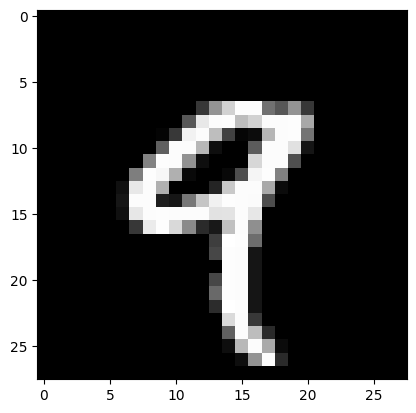

In [9]:
plt.imshow(train_data.data[4],cmap='gray')   #cmp  CMAP을 반드시 입력해줘야한다
plt.show()

In [10]:
#이제 모델을 만들어야지


train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

In [11]:
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [12]:
next(iter(train_loader))[0].shape   # 얘는 4차원이다

torch.Size([32, 1, 28, 28])

In [13]:
model = nn.Sequential(
    nn.Linear(784,64),
    nn.ReLU(),
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,10)
)

model

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=10, bias=True)
)

In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'  # 이코드는 무조건

device

'cuda'

In [15]:
model.to(device)   # 이걸 GPU에 올려서 학습

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=10, bias=True)
)

In [16]:
from torch.optim.adam import Adam

optim = Adam(model.parameters(), lr = 1e-3)

criterion = nn.CrossEntropyLoss()
epochs = 20

for epoch in range(epochs):
    for data,label in train_loader:     # data는 4차원이기때문에 input으로 들어가는 사이즈(2차원)로 맞춰줘야한다
        optim.zero_grad()               # 기울기 초기화
        data = torch.reshape(data,(-1,784))    # 4차원을 2차원으로 바꿔야함 (행의 개수는 니맘대로, 열을 784개로)
        data = data.to(device)          # 데이터 GPU로 : 학습해야할 모델은 CUDA에 있는데, data는 CPU에 있음. 그래서 data를 CUDA로 옮긴다
        pred = model(data)              # 순전파 예측해본다. data를 모델에 넣어서
        label = label.to(device)        # 정답지 GPU로
        loss = criterion(pred,label)    # 손실계산
        loss.backward()                 # 역전파 (기울기 계산)
        optim.step()
    print('epoch : ', loss)             # 학습을 돌리면서 손실이 잘 떨어지는지 확인하는 용도
                                        # 원래는 평균내서 봐야함


epoch :  tensor(0.0850, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch :  tensor(0.1949, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch :  tensor(0.3425, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch :  tensor(0.0773, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch :  tensor(0.0342, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch :  tensor(0.1155, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch :  tensor(0.2091, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch :  tensor(0.0220, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch :  tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch :  tensor(0.0223, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch :  tensor(0.0066, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch :  tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch :  tensor(0.0599, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch :  tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch :  tensor(0.0009, device='cu

In [17]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0248,  0.0105, -0.0310,  ..., -0.0090,  0.0130,  0.0311],
         [-0.0296,  0.0001,  0.0345,  ...,  0.0212,  0.0019, -0.0264],
         [ 0.0053, -0.0181, -0.0075,  ...,  0.0221,  0.0299,  0.0130],
         ...,
         [-0.0135,  0.0150,  0.0286,  ..., -0.0311, -0.0085, -0.0031],
         [-0.0011,  0.0072, -0.0169,  ...,  0.0001,  0.0336,  0.0233],
         [ 0.0102, -0.0224, -0.0018,  ..., -0.0342, -0.0302,  0.0087]],
        device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([-0.0298, -0.1505,  0.3583, -0.0617,  0.0318,  0.2719,  0.2304,  0.0263,
         -0.1984,  0.2306, -0.0467,  0.1816, -0.0395, -0.0040,  0.1451, -0.0962,
         -0.0430,  0.1159, -0.0700,  0.1706,  0.3008, -0.1055,  0.0741, -0.0039,
          0.2241,  0.0258,  0.1314,  0.2080,  0.2548,  0.1580,  0.0586, -0.0309,
         -0.0206, -0.1290, -0.2551,  0.0165,  0.0432,  0.2042, -0.0521, -0.3231,
          0.1262, -0.1010,  0.2963,  0.3181,  0.2508, -0.0501,

In [30]:
model.eval()

total = 0
correct = 0


with torch.no_grad():
    for data,label in test_loader:
        data = torch.reshape(data,(-1,784))
        data = data.to(device)
        pred = model(data)

        label = label.to(device)

        _, predresult = torch.max(pred,1)

        print(predresult)
        print(label)

        correct += (predresult == label).sum().item()    #item하면 텐서값이 스칼라값으로 빠진다
        total += label.size(0)

        #반복문 한번씩 돌때마다 맞은개수 더해지고 토탈에는 전체 개수 찍힐거다. 

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1], device='cuda:0')
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1], device='cuda:0')
tensor([3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0,
        4, 1, 9, 5, 7, 8, 9, 3], device='cuda:0')
tensor([3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0,
        4, 1, 9, 5, 7, 8, 9, 3], device='cuda:0')
tensor([7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
        6, 1, 3, 6, 9, 3, 1, 4], device='cuda:0')
tensor([7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
        6, 1, 3, 6, 9, 3, 1, 4], device='cuda:0')
tensor([1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2,
        5, 4, 7, 6, 7, 9, 0, 5], device='cuda:0')
tensor([1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2,
        5,

In [31]:
correct / total

0.9731

In [27]:
(predresult == label).sum() / 32

tensor(1., device='cuda:0')

In [ ]:
# 첫번째 이미지는 7번째 이미지가 제일 커



In [20]:
torch.max(torch.tensor([[1,2,3,4,5]]),1)

torch.return_types.max(
values=tensor([5]),
indices=tensor([4]))

In [ ]:
# 가장 큰 값은 [5], [4]번째 인덱스. (0번째=1, 1번째=2, 2번째=3, 3번째=4, 4번째=5)